In [2]:
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
base_dir = '/kaggle/input/fruits/fruits-360_dataset/fruits-360'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Test')

In [4]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, 
    target_size=(100, 100),
    batch_size=100,
    class_mode='categorical'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, 
    target_size=(100, 100),
    batch_size=100,
    class_mode='categorical'
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [13]:
model = models.Sequential()

model.add(layers.Conv2D(16, (5, 5), activation='relu',input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(131, activation='sigmoid'))

In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

In [18]:
earlystop = EarlyStopping(
    monitor='val_acc',
    min_delta=0.005,
    patience=5,
    verbose=1,
)

In [19]:
history = model.fit(
      train_generator,
      steps_per_epoch=677,
      epochs=30,
      validation_data=test_generator,
      validation_steps=50,
      callbacks=[earlystop,]
)

2022-11-20 14:50:15.421797: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-11-20 14:50:18.109573: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


677/677 [==============================] - 340s 488ms/step - loss: 2.0171 - acc: 0.4704 - val_loss: 1.4289 - val_acc: 0.6158
Epoch 2/30
677/677 [==============================] - 101s 149ms/step - loss: 0.6096 - acc: 0.8127 - val_loss: 0.8509 - val_acc: 0.7774
Epoch 3/30
677/677 [==============================] - 99s 145ms/step - loss: 0.3065 - acc: 0.9071 - val_loss: 1.7969 - val_acc: 0.6040
Epoch 4/30
677/677 [==============================] - 99s 147ms/step - loss: 0.1664 - acc: 0.9502 - val_loss: 0.5272 - val_acc: 0.8674
Epoch 5/30
677/677 [==============================] - 95s 141ms/step - loss: 0.1051 - acc: 0.9701 - val_loss: 0.5056 - val_acc: 0.8912
Epoch 6/30
677/677 [==============================] - 93s 137ms/step - loss: 0.0719 - acc: 0.9796 - val_loss: 0.4278 - val_acc: 0.9094
Epoch 7/30
677/677 [==============================] - 94s 138ms/step - loss: 0.0496 - acc: 0.9867 - val_loss: 0.4325 - val_acc: 0.9140
Epoch 8/30
677/677 [==============================] - 104s 153ms

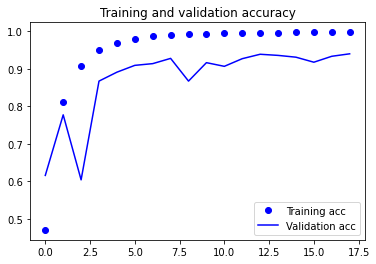

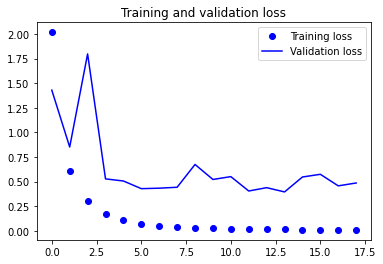

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()